# Index <a class="anchor" id="top"></a>
- [Deque](#deque)
- [Hash Tables](#hash-tables)
- [Sort](#sort)
- [Search](#search)
- [Binary Trees](#binary-trees)
    - [Traversals](#binary-tree-traversals)
    - [DFS Iterative (preorder only)](#binary-trees-dfs-iterative)
    - [DFS Recursive (preorder, inorder, and postorder)](#binary-trees-dfs-recursive)
    - [BFS Iterative (level order)](#binary-trees-bfs-iterative)
- [Trie](#trie)
- [Backtracking Template](#backtracking)
- [Directed Graph Traversals](#directed)
    - [Depth First - Stack](#depth-first)
    - [Breadth First - Queue](#breadth-first)
- [Undirected Graph Traversals](#undirected)
    - [Has Path](#has-path)
    - [Connected Component Count](#connected-component-count)
    - [Max Component](#max-component)
    - [Shortest Path (BFS)](#shortest-path)
    - [Island Count](#island-count)
- [Search in Rotated Array](#search-rotated)
- [Topological Sort](#topological-sort)

## Common Problems
- [Binary Trees](#common-binary-trees)
    - [Max Root To Leaf Path Sum](#common-binary-tree-max-root-to-leaf-path-sum)
    - [Max Path Sum](#common-binary-tree-max-path-sum)

## Deque <a class="anchor" id="deque"></a>
#### Pronounced "deck", means "double-ended queue"

In [1]:
from collections import deque
a = deque()
a.append(3)
a.append(4)
print(a)
a.appendleft(2)
a.appendleft(1)
print(a)
print(a.pop())
print(a.popleft())

deque([3, 4])
deque([1, 2, 3, 4])
4
1


#### Stack
 - push() uses appendleft()
 - pop() uses popleft()

#### Queue:
 - enqueue() uses append()
 - dequeue() uses popleft()

## Hash Tables <a class="anchor" id="hash-tables"></a>

### Dictionaries (Hash maps)

In [2]:
a = {}
a['key1'] = 'first value'
a['key2'] = 'second value'
print(a)
del a['key1']
print(a)

{'key1': 'first value', 'key2': 'second value'}
{'key2': 'second value'}


### Sets (Hash Sets)

In [3]:
a = set()
a.add('item1')
a.add('item2')
print(a)
a.remove('item1')
print(a)

{'item1', 'item2'}
{'item2'}


### Computational Complexity

 - Ideally, O(1) insertion, O(1) lookup. However, collisions!
 - Buckets are linked lists (separate chaining) -> O(1) insertion, O(n) lookup
 - Buckets are balanced binary search trees (AVL trees) -> O(log n) insertion, O(log n) lookup
 - Python dictionaries -> Avg(1) and O(n) for insertion, lookup, and deletion

# Sort <a class="anchor" id="sort"></a>

#### O(nlogn)

In [4]:
a = [-1, 0, -1, 4, 2]
a.sort()
print(a)
a.sort(reverse=True)
print(a)

[-1, -1, 0, 2, 4]
[4, 2, 0, -1, -1]


In [5]:
def lengthKey(str):
  return len(str)

b = ["London", "Paris", "Copenhagen", "Melbourne"]
b.sort(key=lengthKey)
print(b)

['Paris', 'London', 'Melbourne', 'Copenhagen']


# Search <a class="anchor" id="search"></a>

In [6]:
l = [1, 3, 5, 9, 11, 17, 22, 24, 31, 47, 55]

In [7]:
def find_index(target):
    left, right = 0, len(l)
    while left < right:
        middle = (left + right) // 2
        if l[middle] == target:
            return middle
        elif target < l[middle]:
            right = middle
        else:
            left = middle + 1
    return -1

In [8]:
find_index(5)

2

# Binary Trees <a class="anchor" id="binary-trees"></a>

**Criteria:** At most 2 children per node, exactly 1 root, and exactly 1 path between root and any node

In [63]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.left = left
        self.right = right
        self.val = val

In [10]:
a, b, c, d, e, f = Node('A'), Node('B'), Node('C'), Node('D'), Node('E'), Node('F')
a.left, a.right, b.left, b.right, c.right = b, c, d, e, f

### Traversals <a class="anchor" id="binary-tree-traversals"></a>

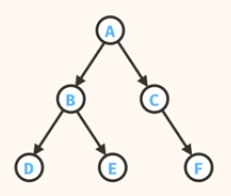

- **DFS Preorder** (root, left, right): A, B, D, E, C, F
- **DFS Inorder** (left, root, right): D, B, E, A, C, F
- **DFS Postorder** (left, right, root): D, E, B, F, C, A
- **BFS Level-order**: A, B, C, D, E, F

### **DFS Iterative** (preorder only) <a class="anchor" id="binary-trees-dfs-iterative"></a>

In [11]:
from collections import deque
def IterativeBinaryTreePreOrderDFS(root):
    stack = deque()
    stack.append(root)
    res = []
    while len(stack) > 0:
        current = stack.pop()
        res.append(current.val)
        if current.right: stack.append(current.right)
        if current.left: stack.append(current.left)
    return res

In [12]:
print('Preorder:', ' '.join(IterativeBinaryTreePreOrderDFS(a)))

Preorder: A B D E C F


### **DFS Recursive** (preorder, inorder, and postorder) <a class="anchor" id="binary-trees-dfs-recursive"></a>

In [13]:
def RecursiveBinaryTreeDFS(root, order='preorder'):
    if root is None: return []
    left = RecursiveBinaryTreeDFS(root.left, order)
    right = RecursiveBinaryTreeDFS(root.right, order)
    if order == 'preorder': return [root.val] + left + right
    if order == 'inorder': return left + [root.val] + right
    if order == 'postorder': return left + right + [root.val]

In [14]:
print('Preorder:', ' '.join(RecursiveBinaryTreeDFS(a, order='preorder')))
print('Inorder:', ' '.join(RecursiveBinaryTreeDFS(a, order='inorder')))
print('Postorder:', ' '.join(RecursiveBinaryTreeDFS(a, order='postorder')))

Preorder: A B D E C F
Inorder: D B E A C F
Postorder: D E B F C A


### **BFS Iterative** (level order) <a class="anchor" id="binary-trees-bfs-iterative"></a>

In [15]:
from collections import deque
def breadthFirstPrint(root):
    queue = deque()
    queue.append(root)
    res = []
    while len(queue) > 0:
        current = queue.pop()
        res.append(current.val)
        if current.left: queue.appendleft(current.left)
        if current.right: queue.appendleft(current.right)
    return res

In [16]:
print('Iterative Preorder:', ' '.join(breadthFirstPrint(a)))

Iterative Preorder: A B C D E F


# Constructing a Trie (prefix tree) <a class="anchor" id="trie"></a>

In [17]:
class Solution:
    def findWords(self, words):        
        trie = {}
        for word in words:
            node = trie
            for letter in word:
                # retrieve the next node; If not found, create a empty node.
                node = node.setdefault(letter, {})
            # mark the existence of a word in trie node
            node['$'] = word

Big O: For N words and M max length string
 - Search/Insert:
     - O(M) time
     - O(1) memory
 - Construct:
     - O(N * L) time (L is average word length)
     - O(Alphabet size * M * N) memory

# Backtracking Template <a class="anchor" id="backtracking"></a>

In [18]:
def backtrack(candidate):
    if find_solution(candidate):
        output(candidate)
        return
    
    # iterate all possible candidates.
    for next_candidate in list_of_candidates:
        if is_valid(next_candidate):
            # try this partial candidate solution
            place(next_candidate)
            # given the candidate, explore further.
            backtrack(next_candidate)
            # backtrack
            remove(next_candidate)

# Directed Graph Traversals <a class="anchor" id="directed"></a>

In [19]:
graph = {
    'a': ['c', 'b'],
    'b': ['d'],
    'c': ['e'],
    'd': ['f'],
    'e': [],
    'f': []
}

## Depth First - Stack <a class="anchor" id="depth-first"></a>

#### Could also use recursion

In [20]:
from collections import deque
def depthFirstPrint(graph, source):
    stack = deque(source)
    visited = set()
    visited.add(source)
    while len(stack) > 0:
        current = stack.pop()
        print(current)
        for neighbor in graph[current]:
            if not neighbor in visited:
                visited.add(neighbor)
                stack.append(neighbor)

In [21]:
depthFirstPrint(graph, 'a')

a
b
d
f
c
e


## Breadth First - Queue <a class="anchor" id="breadth-first"></a>

In [22]:
from collections import deque
def breadthFirstPrint(graph, source):
    queue = deque(source)
    visited = set()
    visited.add(source)
    while len(queue) > 0:
        current = queue.pop()
        print(current)
        for neighbor in graph[current]:
            if not neighbor in visited:
                visited.add(neighbor)
                queue.appendleft(neighbor)

In [23]:
breadthFirstPrint(graph, 'a')

a
c
b
e
d
f


# Undirected Graph Traversals - Cycle Checking <a class="anchor" id="undirected"></a>

In [24]:
edges = [
    ['i', 'j'],
    ['k', 'i'],
    ['m', 'k'],
    ['k', 'l'],
    ['o', 'n']
]

In [25]:
def buildGraph(edges):
    graph = {}
    for edge in edges:
        [a, b] = edge
        if not a in graph:
            graph[a] = []
        if not b in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)
    return graph

In [26]:
g = buildGraph(edges)
print(g)

{'i': ['j', 'k'], 'j': ['i'], 'k': ['i', 'm', 'l'], 'm': ['k'], 'l': ['k'], 'o': ['n'], 'n': ['o']}


### Has Path <a class="anchor" id="has-path"></a>

In [27]:
def hasPath(graph, src, dst, visited = set()):
    if src == dst:
        return True
    if src in visited:
        return False
    visited.add(src)
    for neighbor in graph[src]:
        if hasPath(graph, neighbor, dst, visited):
            return True
    return False

In [28]:
hasPath(g, 'j', 'm')

True

### Connected Component Count <a class="anchor" id="connected-component-count"></a>

In [29]:
def connectedComponentCount(graph):
    visited = set()
    count = 0
    for node in graph:
        if explore(graph, node, visited):
            count += 1
    return count

def explore(graph, current, visited):
    if current in visited:
        return False
    visited.add(current)
    for neighbor in graph[current]:
        explore(graph, neighbor, visited)
    return True

In [30]:
gc = {
    0: [8, 1, 5],
    1: [0],
    5: [0, 8],
    8: [0, 5],
    2: [3, 4],
    3: [2, 4],
    4: [3, 2]
}

In [31]:
connectedComponentCount(gc)

2

### Max Component <a class="anchor" id="max-component"></a>

In [32]:
def maxComponentCount(graph):
    visited = set()
    maximum = 0
    for node in graph:
        e = explore(graph, node, visited)
        maximum = max(maximum, e)
    return maximum

def explore(graph, current, visited):
    if current in visited:
        return 0
    visited.add(current)
    size = 1
    for neighbor in graph[current]:
        size += explore(graph, neighbor, visited)
    return size

In [33]:
maxComponentCount(gc)

4

### Shortest Path (BFS) <a class="anchor" id="shortest-path"></a>

In [34]:
from collections import deque
def shortestPath(graph, source, destination):
    queue = deque([(source, 0)])
    visited = set()
    visited.add(source)
    while len(queue) > 0:
        [current, distance] = queue.pop()
        if current == destination:
            return distance
        for neighbor in graph[current]:
            if not neighbor in visited:
                visited.add(neighbor)
                queue.appendleft([neighbor, distance + 1])
    return -1

In [35]:
se = [
    ['w', 'x'],
    ['x', 'y'],
    ['z', 'y'],
    ['z', 'v'],
    ['w', 'v']
]

In [36]:
sg = buildGraph(se)

In [37]:
shortestPath(sg, 'w', 'z')

2

### Island Count <a class="anchor" id="island-count"></a>

In [38]:
grid = [
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'W', 'W', 'L', 'W'],
    ['W', 'W', 'L', 'L', 'W'],
    ['L', 'W', 'W', 'L', 'L'],
    ['L', 'L', 'W', 'W', 'W'],
]

In [39]:
def islandCount(grid):
    visited = set()
    count = 0
    for r in range(0, len(grid)):
        for c in range(0, len(grid[0])):
            if explore(grid, r, c, visited):
                count += 1
    return count

def explore(grid, r, c, visited):
    rowInBounds = 0 <= r and r < len(grid)
    colInBounds = 0 <= c and c < len(grid[0])
    if not rowInBounds or not colInBounds:
        return False
    if grid[r][c] == 'W':
        return False
    pos = str(r) + ',' + str(c)
    if pos in visited:
        return False
    visited.add(pos)
    explore(grid, r-1, c, visited)
    explore(grid, r+1, c, visited)
    explore(grid, r, c-1, visited)
    explore(grid, r, c+1, visited)
    return True

In [40]:
islandCount(grid)

3

## Search in a Rotated Array (don't copy) <a class="anchor" id="search-rotated"></a>

In [41]:
class Solution:
    def search(self, nums, target: int):
        start, end = 0, len(nums) - 1
        while start <= end:
            mid = start + (end - start) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] >= nums[start]:
                if target >= nums[start] and target < nums[mid]:
                    end = mid - 1
                else:
                    start = mid + 1
            else:
                if target <= nums[end] and target > nums[mid]:
                    start = mid + 1
                else:
                    end = mid - 1
        return -1

## Topological Sorting (with in-degree) <a class="anchor" id="topological-sort"></a>

Algorithm

    1. Initialize a queue, Q to keep a track of all the nodes in the graph with 0 in-degree.
    2. Iterate over all the edges in the input and create an adjacency list and also a map of node v/s in-degree.
    3. Add all the nodes with 0 in-degree to Q.
    4. The following steps are to be done until the Q becomes empty.
        a. Pop a node from the Q. Let's call this node, N.
        b. For all the neighbors of this node, N, reduce their in-degree by 1. If any of the nodes' in-degree reaches 0, add it to the Q.
        c. Add the node N to the list maintaining topologically sorted order.
        Continue from step 4.1.


# Common Problems

# Binary Trees <a class="anchor" id="common-binary-trees"></a>

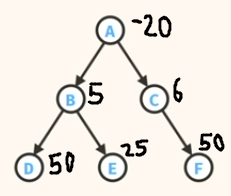

In [79]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.left = left
        self.right = right
        self.val = val

In [80]:
an, bn, cn, dn, en, fn = Node(-20), Node(5), Node(6), Node(50), Node(25), Node(50)
an.left, an.right, bn.left, bn.right, cn.right = bn, cn, dn, en, fn

### Max Root to Leaf Path Sum <a class="anchor" id="common-binary-tree-max-root-to-leaf-path-sum"></a>

- Recursive DFS
- Base case: No children -> return 0
- Decision: Current value + max(left value, right value)

In [81]:
def maxRootToLeafPathSumOfBinaryTree(root):
    left_max = maxRootToLeafPathSum(root.left) if root.left else 0
    right_max = maxRootToLeafPathSum(root.right) if root.right else 0
    return root.val + max(left_max, right_max)

In [82]:
maxRootToLeafPathSum(an)

36

### Max Path Sum <a class="anchor" id="common-binary-tree-max-path-sum"></a>

- Recursive DFS
- Track both "line max" and "global max"
- Base case: No children -> return 0 for line max and 0 for global max
- Line max decision: max(left_line_max + root, right_line_max + root, root)
- Global max decision: max(left_global_max, right_global_max, left_line_max + right_line_max + root) 

In [83]:
def maxPathSumOfBinaryTree(root):
    left_max, left_global_max = 0, 0
    right_max, right_global_max = 0, 0 
    if root.left:
        left_max, left_global_max = maxPathSumOfBinaryTree(root.left)
    if root.right:
        right_max, right_global_max = maxPathSumOfBinaryTree(root.right)
    line_max = max(left_max + root.val, right_max + root.val, root.val)
    global_max = max(left_global_max, right_global_max, left_max + right_max + root.val)
    return line_max, global_max

In [84]:
line_max, global_max = maxPathSumOfBinaryTree(an)
max(line_max, global_max)

91

### [Top](#top)